# Introduction to Matplotlib

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

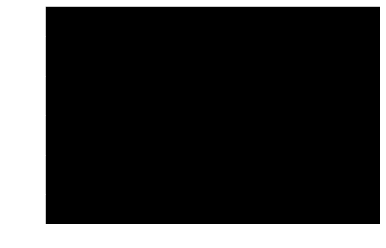

In [10]:
plt.plot();

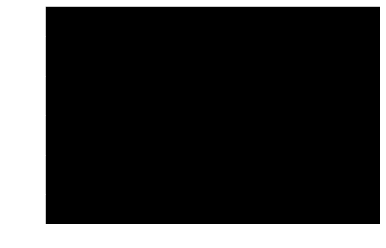

In [11]:
plt.plot()
plt.show()

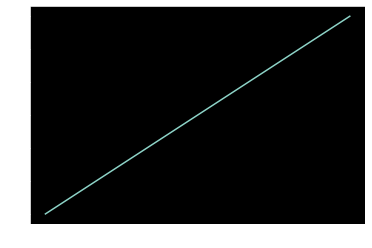

In [13]:
plt.plot([1, 2, 3, 4]);

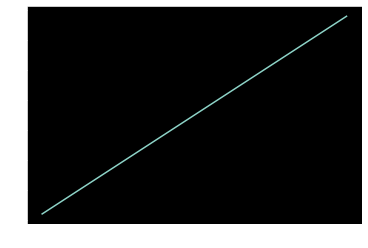

In [14]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

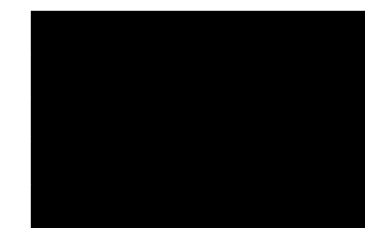

In [15]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot()
plt.show()

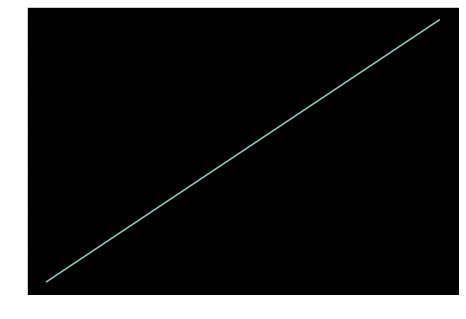

In [18]:
# 2nd method
fig = plt.figure() 
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

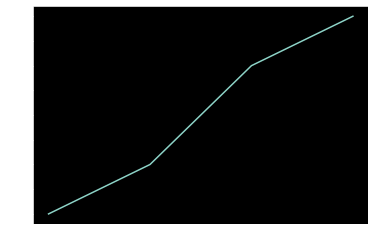

In [22]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]);
type(fig), type(ax)

## Matplotlib example workflow

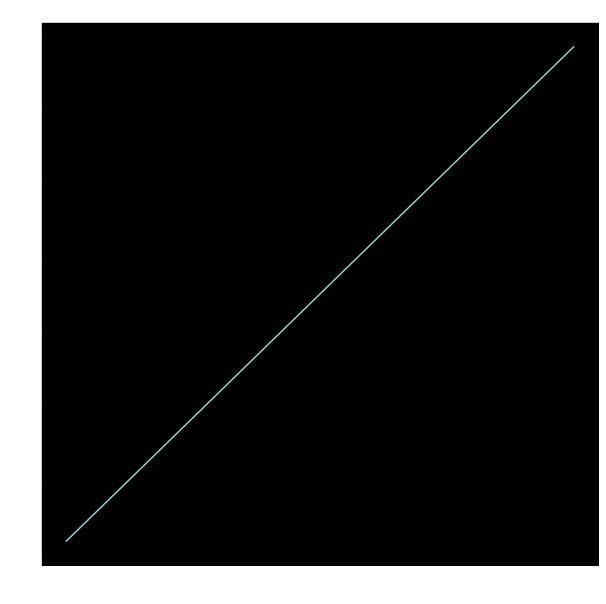

In [25]:
# 0. import matplotlib abd get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # width, heigth

# 3. Plot the data
ax.plot(x, y)

# 4. Customize plot
ax.set(
    title="Simple Plot",
    xlabel="x-axis",
    ylabel="y-label"
)

# 5. Save & show figure
fig.savefig("Images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar Plot
* Hist
* Subplots

In [26]:
import numpy as np

In [29]:
# Create some data
x = np.linspace(0, 10, 100)

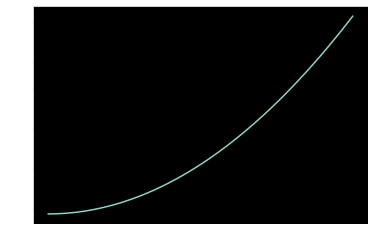

In [31]:
fig, ax = plt.subplots()
ax.plot(x, x**2);

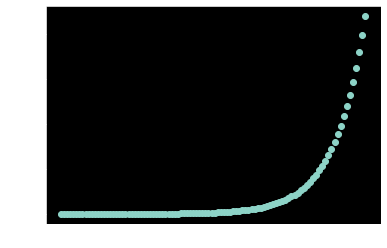

In [33]:
# Use the same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

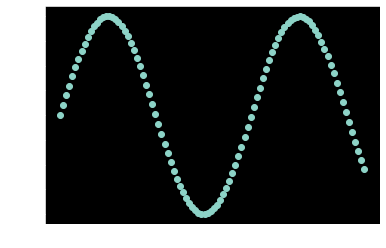

In [34]:
# Another one
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

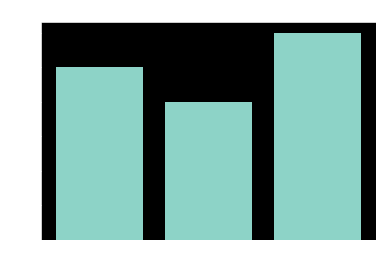

In [45]:
# Make a plot from dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12,
}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(
    title="Dan's Nut Butter Store",
    ylabel="Price ($)",
);

<BarContainer object of 3 artists>

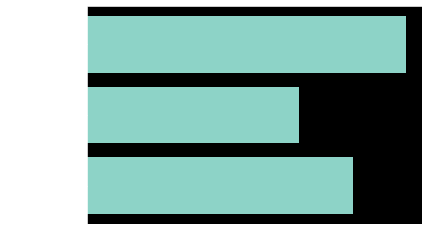

In [47]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

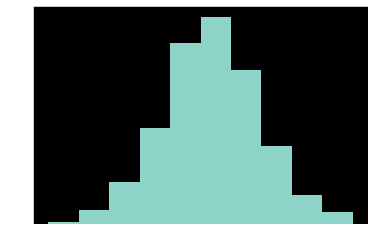

In [49]:
# Make some data
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

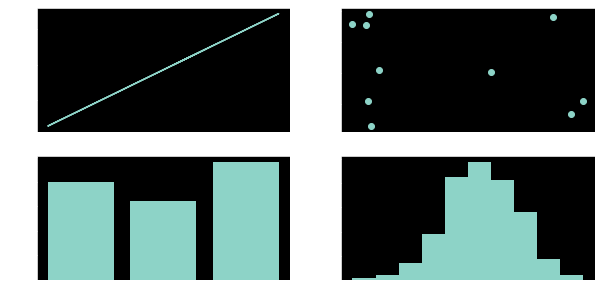

In [54]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(10, 5)
);
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

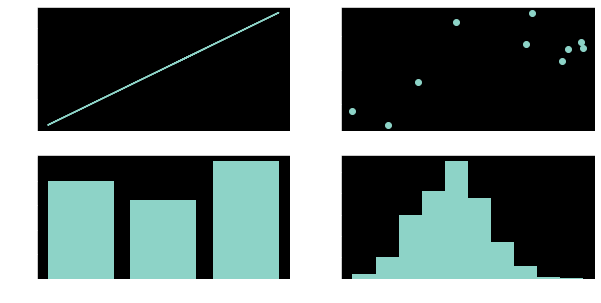

In [57]:
# Subplot option 2
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(10, 5)
)
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrame

In [58]:
import pandas as pd

In [64]:
# Make a DataFrame
import os
if not os.path.exists("car-sales.csv"):
    !python -m wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


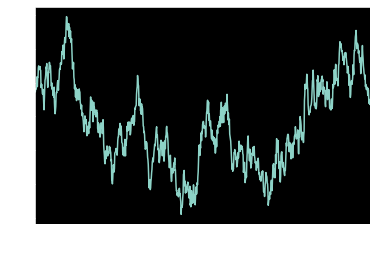

In [69]:
ts = pd.Series(
    np.random.randn(1000),
    index=pd.date_range("1/1/2022",
    periods=1000)
)
ts = ts.cumsum()
ts.plot();

In [71]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\gutsc\AppData\Local\Temp/ipykernel_23368/2276578600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [72]:
type(car_sales["Price"])

pandas.core.series.Series

In [75]:
# Remoce last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [77]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [81]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


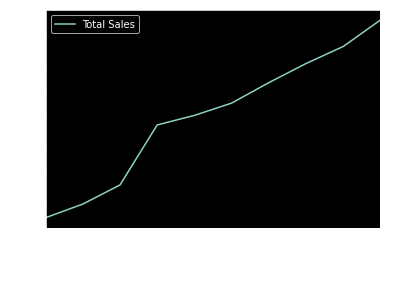

In [82]:
# Let's plot total sales
car_sales.plot(
    x="Sale Date",
    y="Total Sales"
);

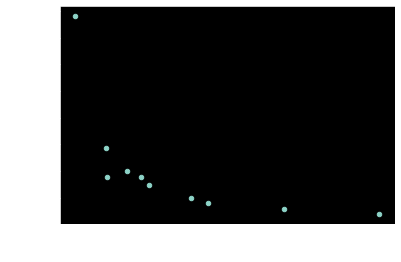

In [86]:
car_sales["Price"] = car_sales["Price"].astype(int)

car_sales.plot(
    x="Odometer (KM)",
    y="Price",
    kind="scatter"
);

In [89]:
# How about a bar graph
x = np.random.rand(10, 4)

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.311733,0.000636,0.093676,0.929708
1,0.602878,0.494433,0.604233,0.156246
2,0.897777,0.209989,0.257426,0.555178
3,0.579856,0.475017,0.866881,0.676969
4,0.363050,0.633896,0.419693,0.472965
5,0.723699,0.085042,0.013569,0.709595
6,0.452859,0.381009,0.500278,0.586406
7,0.631683,0.593787,0.696432,0.155708
8,0.685875,0.752599,0.496527,0.261557
9,0.734434,0.070135,0.123360,0.870672


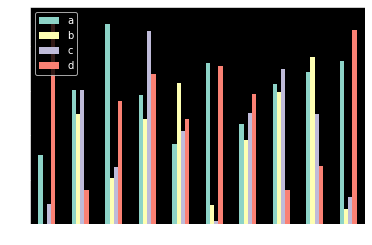

In [91]:
df.plot.bar();

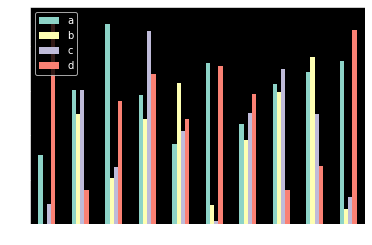

In [93]:
df.plot(kind="bar");

In [94]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


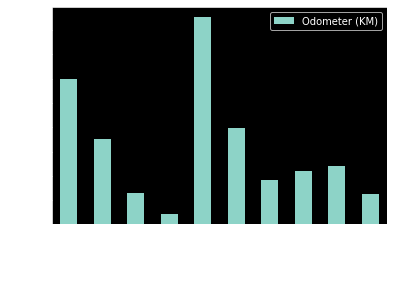

In [96]:
car_sales.plot(
    x="Make",
    y="Odometer (KM)",
    kind="bar"
);

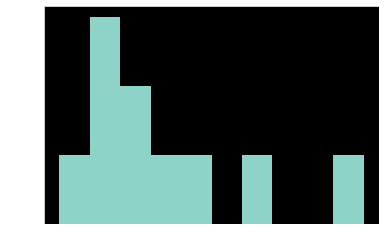

In [97]:
# How about histograms
car_sales["Odometer (KM)"].plot.hist();

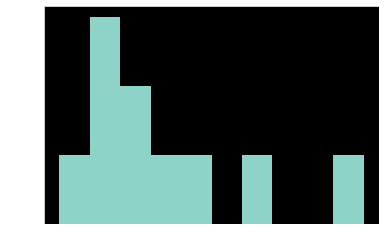

In [98]:
car_sales["Odometer (KM)"].plot(kind="hist");

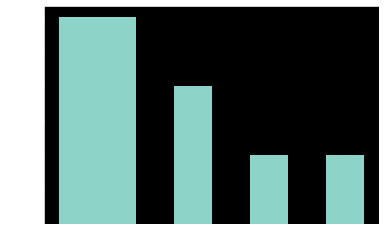

In [103]:
car_sales["Odometer (KM)"].plot.hist(bins=8);

In [105]:
# Let's try on another dataset
import os
if not os.path.exists("heart-disease.csv"):
    !python -m wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='Frequency'>

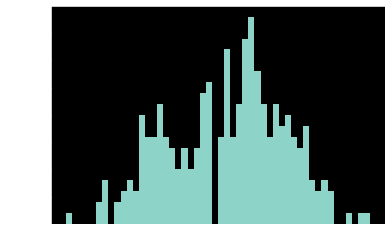

In [110]:
# Create a histogram
heart_disease["age"].plot.hist(bins=50)

In [112]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


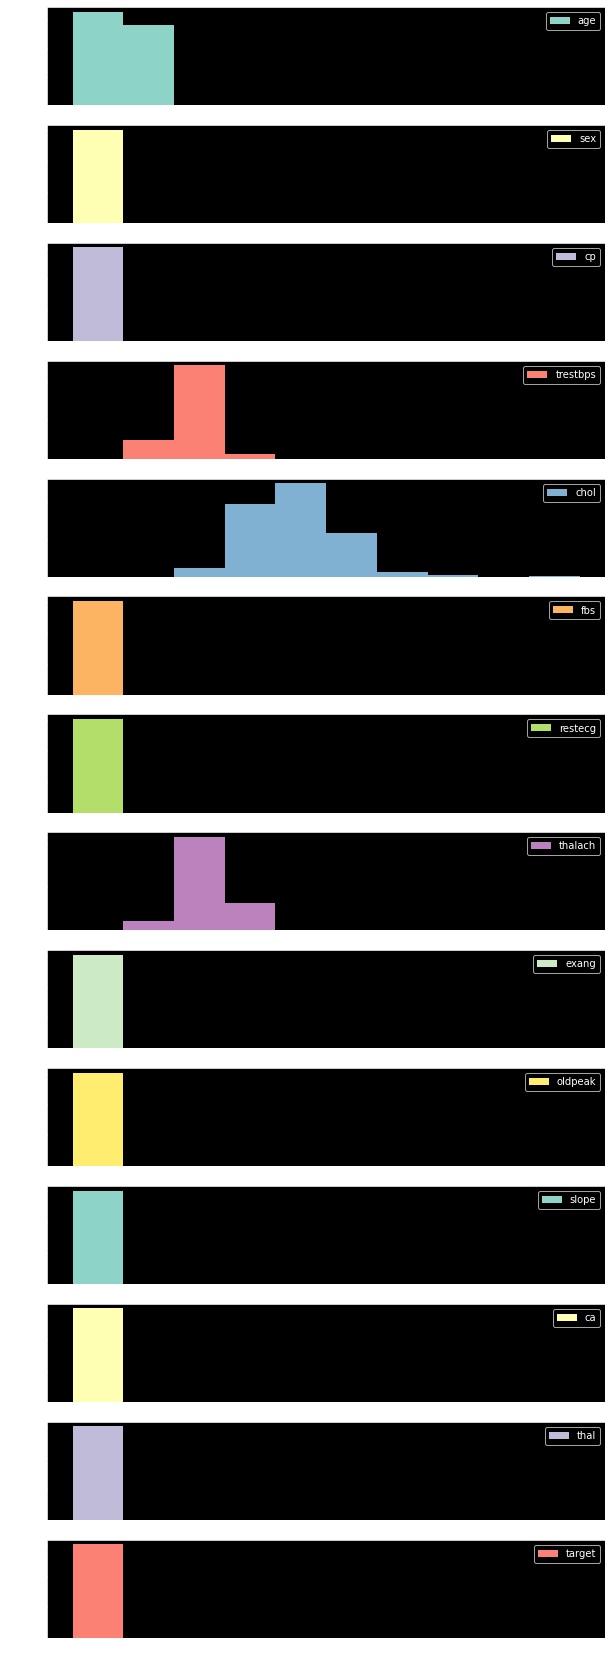

In [117]:
heart_disease.plot.hist(
    subplots=True,
    figsize=(10, 30)
);

### Which one should you use? (pyplot vs matplotlib OO method)
 
* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [120]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head(), len(over_50)

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 5   57    1   0       140   192    0        1      148      0      0.4      1   
 6   56    0   1       140   294    0        0      153      0      1.3      1   
 
    ca  thal  target  
 0   0     1       1  
 3   0     2       1  
 4   0     2       1  
 5   0     1       1  
 6   0     2       1  ,
 208)

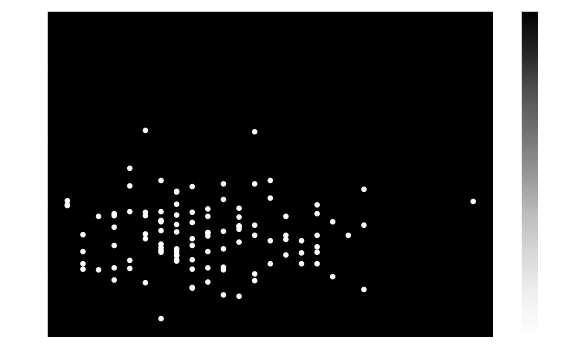

In [133]:
# Pyplot method
over_50.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target",
    figsize=(10, 6)
);

(45.0, 100.0)

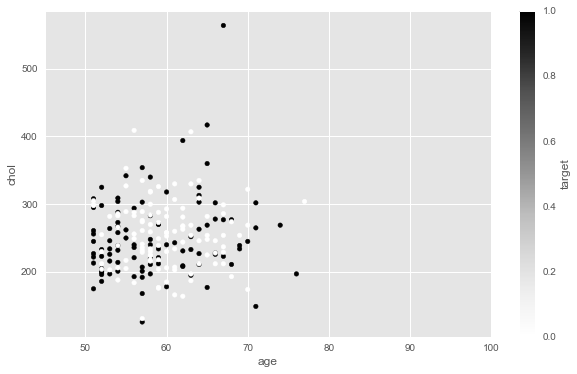

In [185]:
## OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target",
    ax=ax
);

ax.set_xlim([45, 100])

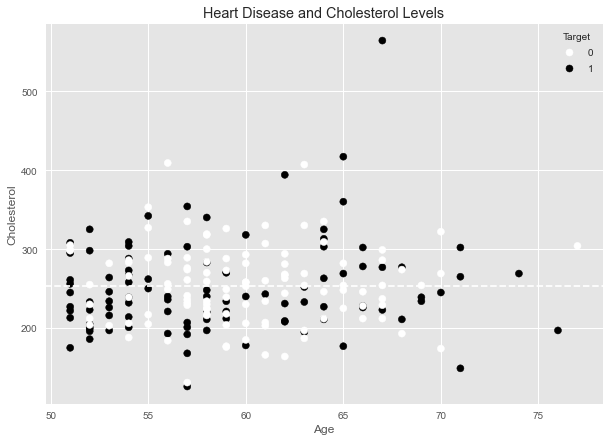

In [186]:
## OO Method from scratch
fig, ax = plt.subplots(figsize=(10, 7));

# Plot the data
scatter = ax.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"]
);

# Customize
ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholesterol"
);

# Legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add horizontal line
ax.axhline(
    over_50["chol"].mean(),
    linestyle="--"
);

In [187]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


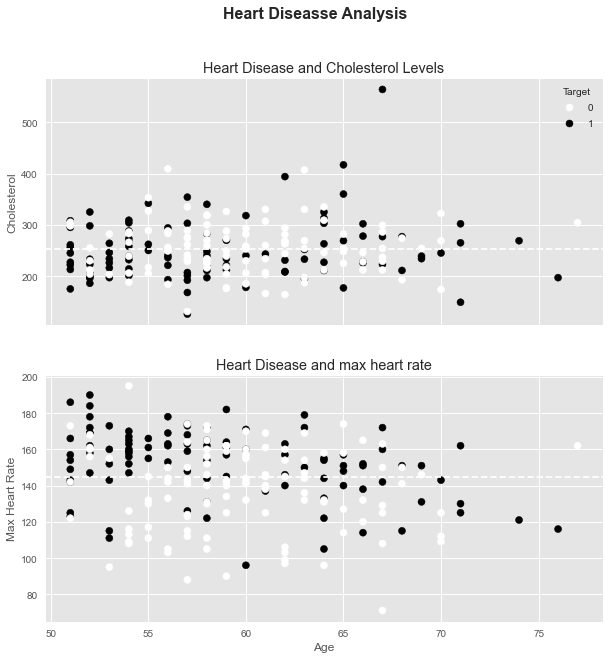

In [188]:
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10),
    sharex=True
);

# Add data
scatter = ax0.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"]
)

# Customize ax0
ax0.set(
    title="Heart Disease and Cholesterol Levels",
    ylabel="Cholesterol"
)

# Legend
ax0.legend(*scatter.legend_elements(), title="Target");

# Meanline
ax0.axhline(
    y=over_50["chol"].mean(),
    linestyle="--"
);

# Add data to ax1
scatter = ax1.scatter(
    x=over_50["age"],
    y=over_50["thalach"],
    c=over_50["target"]
);

# Customize ax1
ax1.set(
    title="Heart Disease and max heart rate",
    xlabel="Age",
    ylabel="Max Heart Rate"
);

# Meanline
ax1.axhline(
    y=over_50["thalach"].mean(),
    linestyle="--"
);

# Add a title to the figure
fig.suptitle("Heart Diseasse Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [189]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

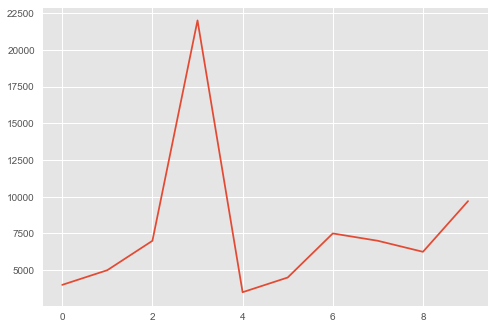

In [190]:
car_sales["Price"].plot();

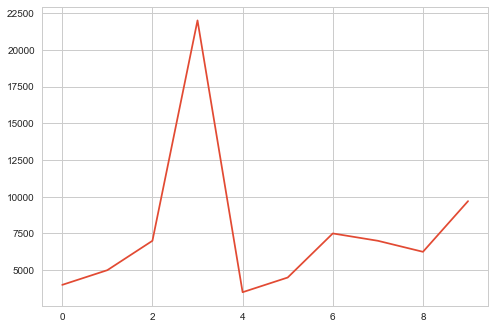

In [191]:
plt.style.use("seaborn-whitegrid")
car_sales["Price"].plot();

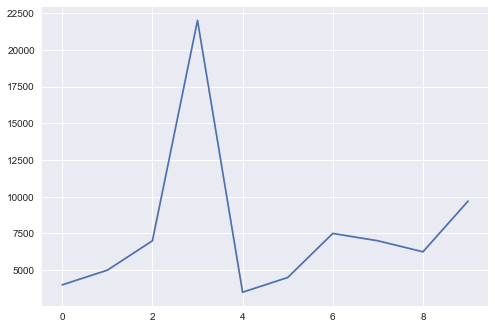

In [192]:
plt.style.use("seaborn")
car_sales["Price"].plot();

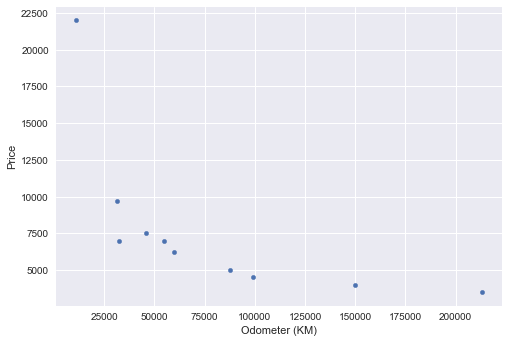

In [193]:
car_sales.plot(
    x="Odometer (KM)",
    y="Price",
    kind="scatter"
);

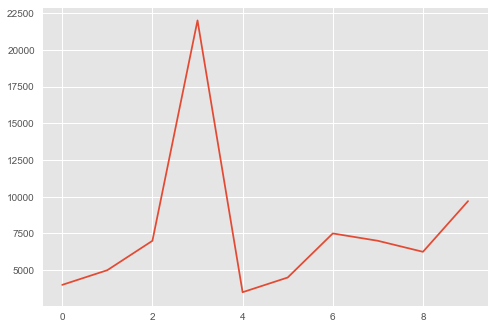

In [194]:
plt.style.use("ggplot")
car_sales["Price"].plot();

In [195]:
# Create some data
x = np.random.randn(10, 4)

In [196]:
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,0.541915,-1.019252,-0.434431,1.682510
1,0.225116,-0.830145,-0.824006,-0.896951
2,0.505920,0.484611,-0.478904,-0.491237
3,-1.031191,-0.771750,1.406285,-0.323101
4,-0.409267,0.540729,0.711217,-0.706792
5,0.281026,0.286367,0.382468,-0.917285
6,-1.125627,0.863678,-1.071265,0.675780
7,-1.197908,-0.154174,1.988397,-0.163687
8,0.937640,-1.678795,0.394084,-1.354043
9,-1.872629,-1.298321,0.600920,1.447901


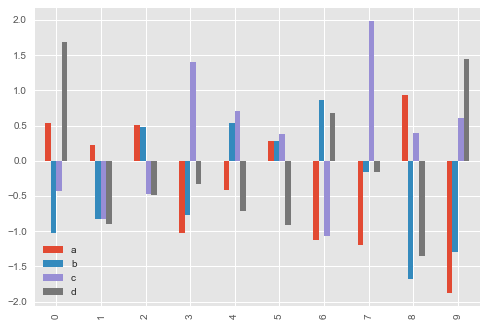

In [197]:
ax = df.plot(
    kind="bar"
);

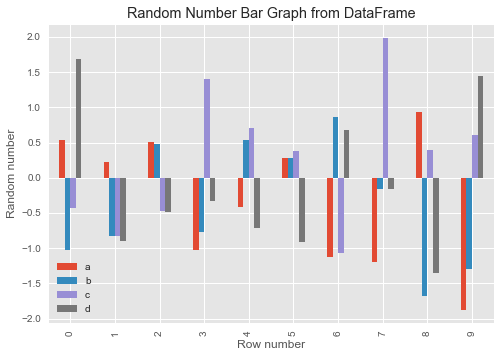

In [198]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(
    title="Random Number Bar Graph from DataFrame",
    xlabel="Row number",
    ylabel="Random number"
);
# Make the legend visible
ax.legend().set_visible(True)


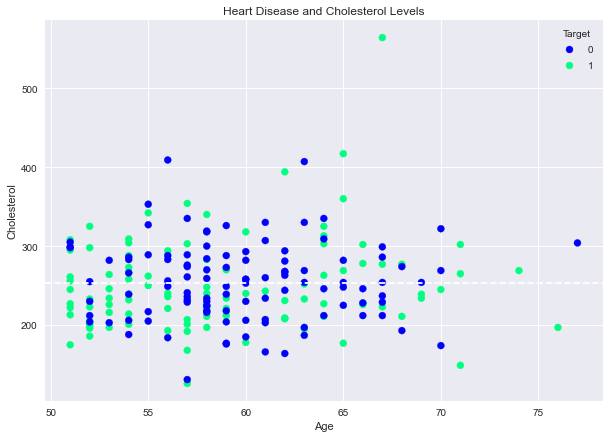

In [210]:
# Set the style
plt.style.use("seaborn")

## OO Method from scratch
fig, ax = plt.subplots(figsize=(10, 7));

# Plot the data
scatter = ax.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"],
    cmap="winter"
);

# Customize
ax.set(
    title="Heart Disease and Cholesterol Levels",
    xlabel="Age",
    ylabel="Cholesterol"
);

# Legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add horizontal line
ax.axhline(
    over_50["chol"].mean(),
    linestyle="--"
);

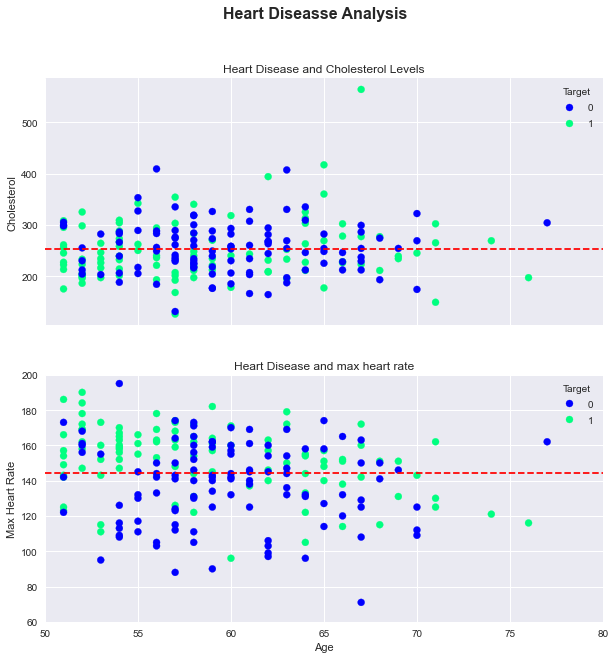

In [221]:
# Customizing the y and x axis limitations
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10),
    sharex=True
);

# Add data
scatter = ax0.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"],
    cmap="winter"
)

# Customize ax0
ax0.set(
    title="Heart Disease and Cholesterol Levels",
    ylabel="Cholesterol"
)
ax0.set_xlim([50, 80])
#ax0.set_ylim([60, 200])

# Legend
ax0.legend(*scatter.legend_elements(), title="Target");

# Meanline
ax0.axhline(
    y=over_50["chol"].mean(),
    linestyle="--",
    c="red"
);

# Add data to ax1
scatter = ax1.scatter(
    x=over_50["age"],
    y=over_50["thalach"],
    c=over_50["target"],
    cmap="winter"
);

# Customize ax1
ax1.set(
    title="Heart Disease and max heart rate",
    xlabel="Age",
    ylabel="Max Heart Rate"
);

ax1.set_ylim([60, 200])

# Meanline
ax1.axhline(
    y=over_50["thalach"].mean(),
    linestyle="--",
    c="red"
);

# Legend
ax1.legend(*scatter.legend_elements(), title="Target");

# Add a title to the figure
fig.suptitle("Heart Diseasse Analysis", fontsize=16, fontweight="bold");

In [223]:
fig.savefig("heart-disease-analysis-plot-saved-with-code.png")